In [5]:
# Import required libraries and create dataframe
import pandas as pd
import numpy as np
df = pd.read_csv('/content/california_housing.csv')
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


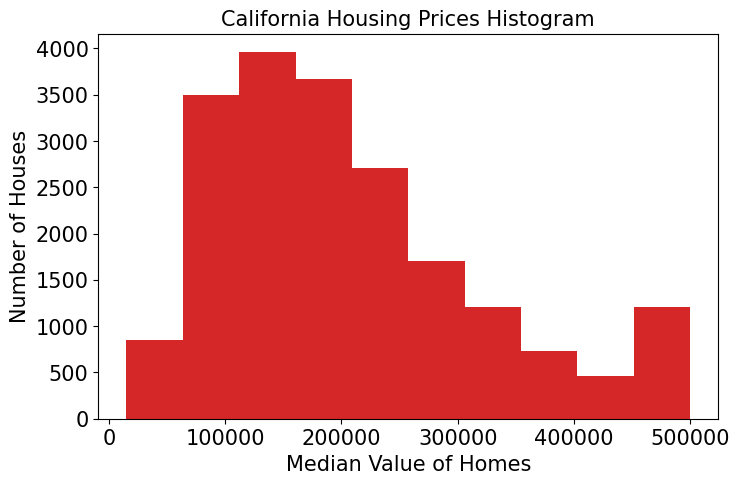

In [6]:
# Histogram for number of houses vs median value
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.hist(df['median_house_value'], color = 'Tab:red')
plt.title('California Housing Prices Histogram', fontsize = 15)
plt.xlabel('Median Value of Homes', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Number of Houses', fontsize = 15)
plt.show()

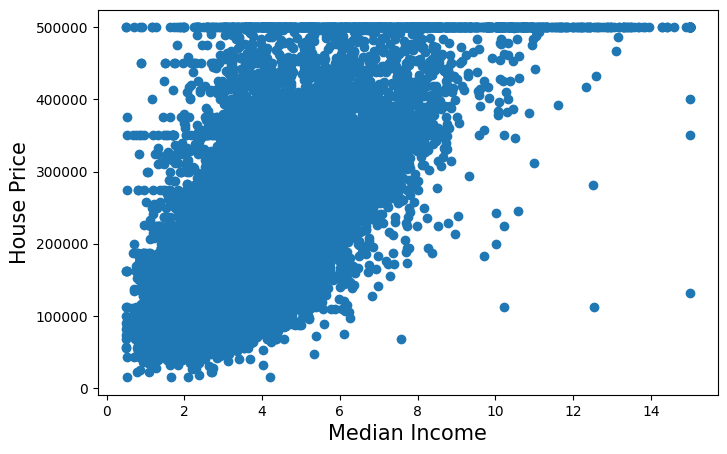

In [14]:
# Scatter plot for comparing target variable and income
plt.figure(figsize = (8, 5))
plt.scatter(x = df['median_income'], y = df['median_house_value'], color = 'Tab:blue')
plt.xlabel('Median Income', fontsize = 15)
plt.ylabel('House Price', fontsize = 15)
plt.show()

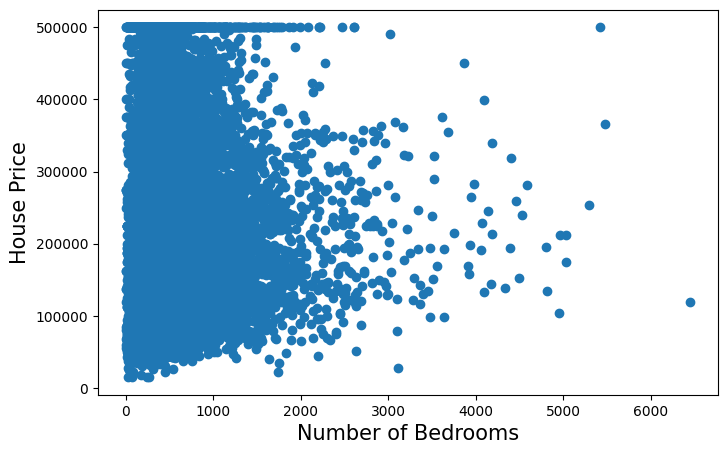

In [13]:
# Scatter plot for comparing target variable and number of bedrooms
plt.figure(figsize = (8, 5))
plt.scatter(x = df['total_bedrooms'], y = df['median_house_value'], color = 'Tab:blue')
plt.xlabel('Number of Bedrooms', fontsize = 15)
plt.ylabel('House Price', fontsize = 15)
plt.show()

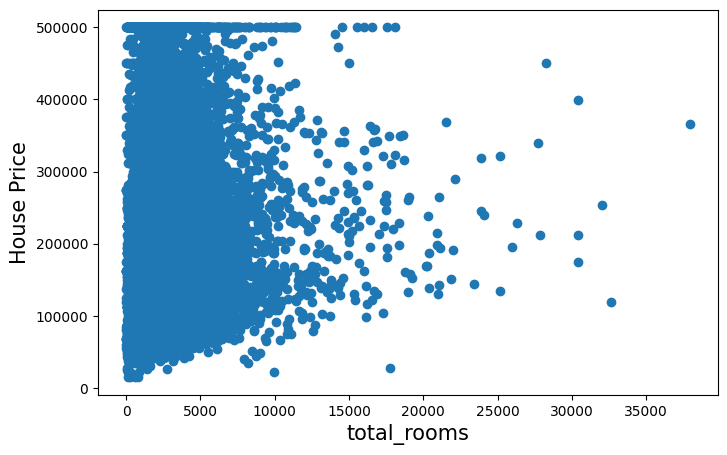

In [12]:
# Scatter plot for comparing target variable and number of rooms
plt.figure(figsize = (8, 5))
plt.scatter(x = df['total_rooms'], y = df['median_house_value'], color = 'Tab:blue')
plt.xlabel('total_rooms', fontsize = 15)
plt.ylabel('House Price', fontsize = 15)
plt.show()

In [ ]:
features_names = df.columns.to_list()[:-1]
X = df[features_names] # features
Y = df['median_house_value'] # Target Variable

from sklearn.model_selection import train_test_split # import for splitting the data
from sklearn.linear_model import LinearRegression #import for linear regression

# Prepare test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Create Linear Regression Model
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Test and Evaluate the Model
pred = my_linear_regression.predict(X_test)
pred

array([251347.23196202,  66700.3451833 , 105042.4562009 , ...,
       320302.54356955,  61471.33576644, 299086.18631992])

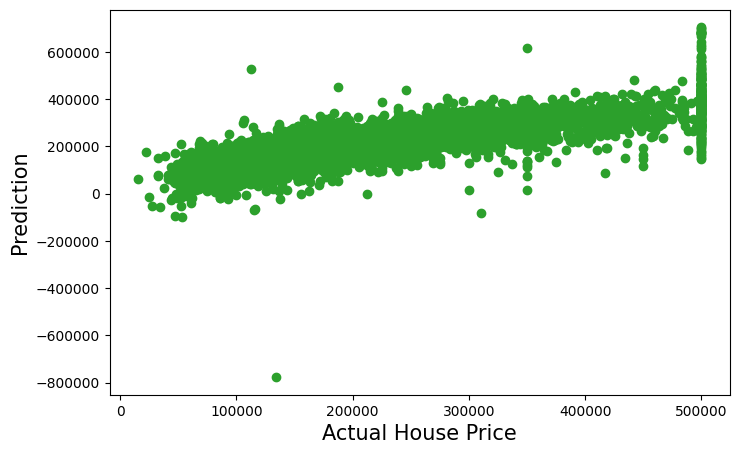

In [ ]:
# Create Scatterplot for the linear regression model
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = pred, color = 'Tab:green')
plt.xlabel('Actual House Price', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

In [ ]:
# Output R2 score
print('The model r2 score is: {}'.format(my_linear_regression.score(X_train, Y_train)))

The model r2 score is: 0.6401549846633445


In [ ]:
# Defining coefficients for each of the variables
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
for i in range(len(features_names)):
  print('The coef (b_{}) is  {}'.format(i+1, my_linear_regression.coef_[i]))

The intercept (b_0) is  -3361263.4608528726
The coef (b_1) is  0.8912800982923328
The coef (b_2) is  -40858.91627299241
The coef (b_3) is  -42662.668143851864
The coef (b_4) is  1145.7723585185624
The coef (b_5) is  -7.250036221357732
The coef (b_6) is  107.32725988782931
The coef (b_7) is  -43.12893881005584
The coef (b_8) is  61.23441119415929
The coef (b_9) is  40140.74628658999


In [ ]:
def MAPE(Y, pred): # MAPE: Mean Abs Percentage Error
  l1 = list(Y)
  l2 = list(pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er)

In [ ]:
# Import metrics needed to calculate errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('MAPE:', MAPE(Y_test, pred)*100, "%")

Mean Absolute Error: 50320.82616860233
Mean Squared Error: 4836018152.499041
Root Mean Squared Error: 69541.48511858976
MAPE: 29.658795519400694 %


The regression model is able to predict approximately 64% of the Median Value of owner-occupied homes. The model contains a Mean Absolute Percentage Error of approximately 29.7%. It is a relatively good model that could be improved. Out of the variables tested, the income seems to have the strongest relationship with house price in the scatterplot. The histogram is skewed to the left and shows that the majority of the homes lie around a median value of roughly 100,000 to 200,000 dollars.